# Computer Lab Exercises week 5 (SOLUTIONS)

* These lab exercises are designed to introduce making jupyter notebooks interactive and using python to create GUIs

* These exercises are **not** part of the assessment of the Module.
* I will post the solutions roughly 1 week after this file has been uploaded to the DLE.
* Please first watch and work through the linkedin learning video https://www.linkedin.com/learning-login/share?account=26140778&forceAccount=false&redirect=https%3A%2F%2Fwww.linkedin.com%2Flearning%2Fpython-gui-development-with-tkinter-2%3Ftrk%3Dshare_ent_url%26shareId%3DuhoH31WaTfWizUsBHk0RcA%253D%253D
* Please note that pasting python from pdf can sometimes cause problems. For example quotation marks can sometimes be converted incorrectly, so then running python will cause errors.

* See https://sites.google.com/view/pythonforstemstudents/home for a collection
of links to information on python.

* See the very complete documentation on tkinter at https://tkdocs.com/tutorial/index.html


## Question 1



##  Question 1a)  Working with Tkinter


* Modify the script below so that there is an additional column (so the GUI looks like the picture below).


![GeomManager](https://github.com/cmcneile/COMP5000-2023-lab/blob/main/geom_manage.png?raw=true)

In [3]:
import tkinter as tk
master = tk.Tk()
tk.Label(master, 
         text="Left top").grid(row=0, column=0)
tk.Label(master, 
         text="Left bottom").grid(row=1,column=0)
tk.mainloop()


In [4]:
# Solution
##
##  https://www.python-course.eu/tkinter_entry_widgets.php
##
import tkinter as tk
master = tk.Tk()
tk.Label(master, 
         text="Left top").grid(row=0, column=0)
tk.Label(master, 
         text="Left bottom").grid(row=1,column=0)
tk.Label(master, 
         text="Right top").grid(row=0, column=1)
tk.Label(master, 
         text="Right bottom").grid(row=1,column=1)
tk.mainloop()


##  Questions about pywidgets
*  See the documentation https://ipywidgets.readthedocs.io/en/7.6.2/index.html

##  Question 2a

* Modify the code below so the square of the number is calculated
* The documentation for interact is at: https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html

In [5]:
from ipywidgets import interact
def f(x):
    return x

In [6]:
interact(f, x=10);

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

In [7]:
# Solution
def f(x):
    return x**2

In [8]:
interact(f, x=10);

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

### Some comments
In the lab a couple of people asked about how to get the value back from the function. I don't see an obvious way to do this using interact.

* One way is to add a global variable to communicate the value back to the notebook

In [9]:
xglobal = 10
def f(x):
    global xglobal
    xglobal = x**2
    return xglobal


In [10]:
interact(f, x=10);

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

In [11]:
print("The value selected is ", xglobal)

The value selected is  25


A better solution is to use the interactive widget

In [13]:
from ipywidgets import interactive
w = interactive(f, x=10)

In [14]:
display(w)

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

In [15]:
w.kwargs

{'x': 15}

In [17]:
w.kwargs['x']

15

##  Question 2b 
* The code below creates blue and red buttons
* Modify the code to add green and black to the option

In [2]:
import ipywidgets as widgets

color_buttons = widgets.ToggleButtons(
    options=['blue', 'red'],
    description='Color:',
)
color_buttons

ToggleButtons(description='Color:', options=('blue', 'red'), value='blue')

In [3]:
print("color = " , color_buttons.value )

color =  blue


In [4]:
# The solution is here
import ipywidgets as widgets

color_buttons = widgets.ToggleButtons(
    options=['blue', 'red', 'green', 'black'],
    description='Color:',
)
color_buttons
#print("color = " , color_buttons.value )

ToggleButtons(description='Color:', options=('blue', 'red', 'green', 'black'), value='blue')

##  Question 2c
* The code below plots a histogram of some random data
* The colour of the data is black. Modify the code so that color can selected interactivly using pywidgets

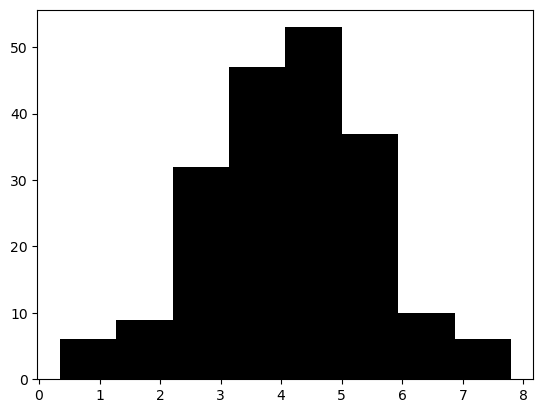

In [5]:
import matplotlib.pyplot as plt
import numpy as np
# make data
np.random.seed(1)
x = 4 + np.random.normal(0, 1.5, 200)

plt.hist(x, bins=8, linewidth=0.5, color="black")
plt.show()

In [11]:
#  Solution
# This cell must be run before the next cell
# This was my first solution
import ipywidgets as widgets

color_buttons = widgets.ToggleButtons(
    options=['blue', 'red', 'green', 'black'],
    description='Color:',
)
color_buttons

ToggleButtons(description='Color:', options=('blue', 'red', 'green', 'black'), value='blue')

color =  blue


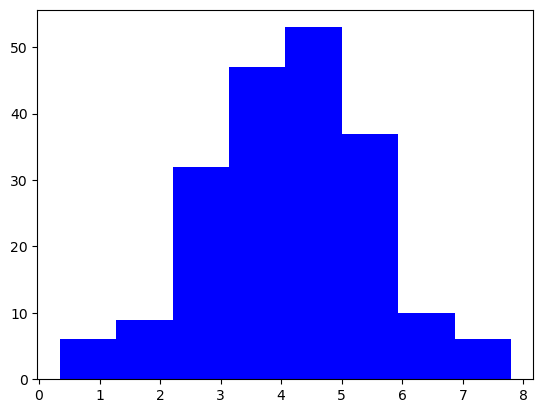

In [12]:
print("color = " , color_buttons.value )

import matplotlib.pyplot as plt
import numpy as np

# make data
np.random.seed(1)
x = 4 + np.random.normal(0, 1.5, 200)

plt.hist(x, bins=8, linewidth=0.5, color=color_buttons.value)
plt.show()

A better solution is to use the interact widgets https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html  

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets

def plot_hist(color) :
    # make data
    np.random.seed(1)
    x = 4 + np.random.normal(0, 1.5, 200)

    plt.hist(x, bins=8, linewidth=0.5, color=color)
    plt.show()

    
#plot_hist("red")

widgets.interact(plot_hist, color=['blue', 'red', 'green', 'black'] );

interactive(children=(Dropdown(description='color', options=('blue', 'red', 'green', 'black'), value='blue'), …

##  Question 2d
* The aim of this question is to create an interactive plot
* The questions uses the interact function in pywidgets  https://ipywidgets.readthedocs.io/en/7.6.2/examples/Using%20Interact.html

In [13]:
#  create some random points to plot
import ipywidgets as widgets

import numpy as np
from matplotlib import pyplot as plt
x = np.random.uniform(0, 5, size=100)
ep = np.random.normal(size=100)

y = 2*x + ep + 1
x_values = np.linspace(0, 5, 1000)

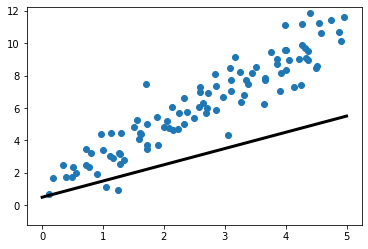

In [14]:


def slope_viz(m=1):
    """
    Plot the random data
    Plot a straight line y = a = mx
    for the intercept a and slope m
    """
    a = 0.5
    plt.scatter(x, y)
    x0 = 0
    x1 = 5
    y0 = a
    y1 = a + m*x1
    
    plt.plot([x0,x1], [y0,y1], lw=3, color='black')
    
    plt.ylim(-1.2, 12.2);# Solution

slope_viz(m=1)

The plot can be made interactive using pywidgets

In [15]:
widgets.interact(slope_viz, m=(0.2, 5, 0.2));

interactive(children=(FloatSlider(value=1.0, description='m', max=5.0, min=0.2, step=0.2), Output()), _dom_cla…

Modify the code so that the intercept parameter a can be varied.  The final plot should look like the plot below


![2lide](https://github.com/cmcneile/COMP5000-2023-lab/blob/main/2slider.png?raw=true)

In [9]:
# Solution

def slope_viz(m=1,a=0):
    """
    Plot the random data
    Plot a straigt line y = a = mx
    for the intercept a and slope m
    """
    plt.scatter(x, y)
    x0 = 0
    x1 = 5
    y0 = a
    y1 = a + m*x1
    
    plt.plot([x0,x1], [y0,y1], lw=3, color='black')
    
    plt.ylim(-1.2, 12.2);

In [10]:
slope_viz(2,1)

NameError: name 'y' is not defined

In [18]:
widgets.interact(slope_viz, m=(0.2, 5, 0.2), a = (-1,1, 0.2));

interactive(children=(FloatSlider(value=1.0, description='m', max=5.0, min=0.2, step=0.2), FloatSlider(value=0…

##  Question 3   Using  a GUI to create a plot


The aim of question is to create a python script with
a radio button. When the radio button is pressed, a bar plot is plotted. See figure

![GUIbarplot](https://github.com/cmcneile/COMP5000-2023-lab/blob/main/gui_barplot.png?raw=true)


* The idea is too combine the plotting code and GUI Checkbutton code below

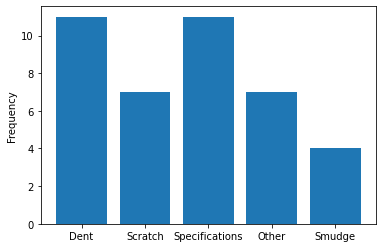

In [19]:
# plotting script
import matplotlib.pyplot as plt
x_pos  = [ 0 , 1 , 2 , 3 , 4] 
bars   = [ "Dent" , "Scratch" , "Specifications" , "Other"  , "Smudge" ] 
frequency = [ 11, 7 , 11 , 7 , 4 ] 
plt.bar(x_pos, frequency)
plt.xticks(x_pos, bars)
plt.ylabel('Frequency')

plt.show()

In [20]:
# GUI Checkbutton

# Modify this script to solve the problem

import matplotlib
matplotlib.use("TkAgg")
from matplotlib import pyplot as plt

import tkinter as tk
from _cffi_backend import callback
 
def callBackFunc():
     print("Oh. I'm clicked" , chkValue.get())
   
root = tk.Tk() 
root.geometry('250x200')

chkValue = tk.BooleanVar() 
chkValue.set(False)
 
chkExample = tk.Checkbutton(root, text='Barplot', 
                            var=chkValue, command=callBackFunc) 
chkExample.grid(column=0, row=0)

root.mainloop()


Oh. I'm clicked True


In [21]:
# Solution

In [22]:

import matplotlib.pyplot as plt
x_pos  = [ 0 , 1 , 2 , 3 , 4] 
bars   = [ "Dent" , "Scratch" , "Specifications" , "Other"  , "Smudge" ] 
frequency = [ 11, 7 , 11 , 7 , 4 ]


import matplotlib
matplotlib.use("TkAgg")
from matplotlib import pyplot as plt

import tkinter as tk
from _cffi_backend import callback
 
def callBackFunc():
    plt.bar(x_pos, frequency)
    plt.xticks(x_pos, bars)
    plt.ylabel('Frequency')

plt.show()
   
root = tk.Tk() 
root.geometry('250x200')

chkValue = tk.BooleanVar() 
chkValue.set(False)
 
chkExample = tk.Checkbutton(root, text='Barplot', 
                            var=chkValue, command=callBackFunc) 
chkExample.grid(column=0, row=0)

root.mainloop()
